In [ ]:
# Data processing
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Path configuration for custom module imports  
# -----------------------------------------------------------------------
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------
import warnings  
warnings.filterwarnings("ignore") 

# Custom functions and classes
# -----------------------------------------------------------------------
from src.support_regression import RegressionModels

### Data loading

In [2]:
df = pd.read_csv('../data/output/api_rent_madrid_preprocessed.csv', index_col=0).reset_index(drop=True)
df.head()

,price,size,exterior,rooms,bathrooms,distance,municipality,province,hasLift,numPhotos,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,floor
0,550.0,8.442463,False,4.410093,3,1.048670,657.095509,579.687729,661.431099,1.152172,1.0,0.0,0.0,0.0,0.0,0.0,13.0
1,750.0,-0.221149,True,-0.712507,1,-0.896578,705.594108,693.233618,677.631111,-1.021827,0.0,0.0,0.0,1.0,0.0,0.0,6.0
2,750.0,0.057424,True,0.312013,1,-0.360972,685.520603,693.233618,670.210811,-0.090113,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,400.0,-0.026148,True,0.312013,2,1.926351,637.579238,693.233618,670.210811,0.634554,0.0,0.0,0.0,0.0,1.0,0.0,5.0
4,450.0,0.586712,False,0.312013,1,1.464429,644.084662,579.687729,677.631111,0.013411,0.0,0.0,0.0,1.0,0.0,0.0,5.0


### Model execution

In this notebook, we will run a linear regression model for our data.

In [26]:
linear_model = RegressionModels(df, 'price', frac=0.7, seed=2)
linear_model.model_fit("linear")
linear_model.get_results()
linear_model.get_metrics("linear").round(2)

,R2,MAE,RMSE
train,0.58,43.18,54.86
test,0.61,39.44,51.83


The $ R^2 $ values are relatively high, which means that the predictor variables are reasonably well-selected. However, the difference between the `train` and `test` sets is small, so there is hardly any overfitting. Nonetheless, this is susceptible to changes in the pseudo-random seed used for selecting the subsets to train and test the model.

The `RMSE` value is reasonably low. Considering that the median and mean are around ~700, the error remains below 10%, making the model's performance acceptable.

In [31]:
print(f"Mean: {round(df['price'].mean(), 2)}\nMedian: {df['price'].median()}")

Mean: 673.11
Median: 700.0


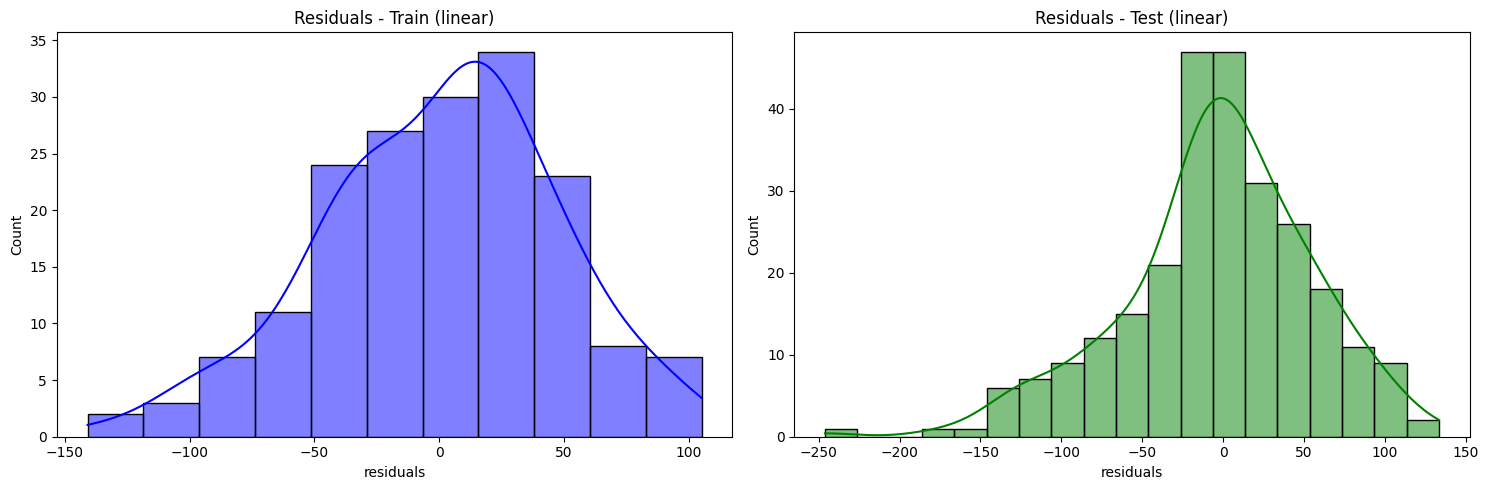

In [13]:
linear_model.plot_residuals('linear')

The residuals cluster around 0, which is indicative of good performance. However, there are some entries with considerable errors, reaching over 200, which could signify a significant mistake. Additionally, there is a noticeable leftward bias that may be due to the asymmetrical nature of the initial data.

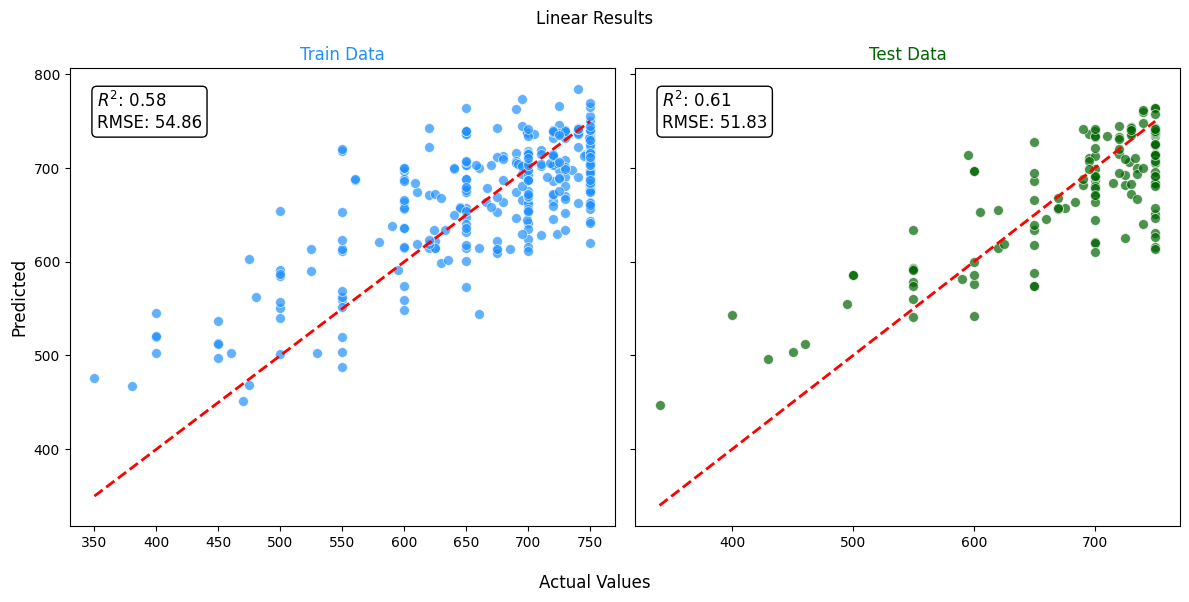

In [32]:
linear_model.plot_actual_vs_prediction('linear')

Overall, the tendency is to make good predictions, but there is some dispersion in all directions. To improve the model, more data may be needed.

### Model dump

In [ ]:
with open('../models/linear_model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)